In [1]:
import pandas as pd

Data from [Economic Tracker](https://tracktherecovery.org) and [the accompanying paper](https://opportunityinsights.org/wp-content/uploads/2020/05/tracker_paper.pdf)

In [2]:
df = pd.read_csv("../data/UI Claims - County - Weekly.csv", dtype={"countyfips":str, "initclaims_rate_regular":float})

In [3]:
df = df.filter(["countyfips", "initclaims_rate_regular"])

In [4]:
df = df.groupby(['countyfips']).sum().reset_index()

In [5]:
df.head()

,countyfips,initclaims_rate_regular
0,1001,26.0512
1,1003,30.8648
2,1005,24.5891
3,1007,35.7501
4,1009,15.1614


In [6]:
df.rename(columns={'initclaims_rate_regular': 'Unemployment Initial Claims'}, inplace=True)

array([[<AxesSubplot:title={'center':'Unemployment Initial Claims'}>]],
      dtype=object)

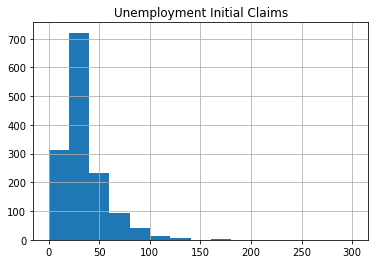

In [7]:
df.hist(bins=15)

In [6]:
df.count()

countyfips                 1424
initclaims_rate_regular    1424
dtype: int64

In [7]:
# Read in data 
data = pd.read_csv('../data/merged_data.csv', dtype={'FIPS': object})
data = data.drop([data.columns[0],"countycode"], axis=1)
data.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,...,% Veterans in Civilian Adult Population,opioid death rate,% Below Poverty,Median Household Income,% No College Degree,Unemployment Rate,% Not in Labor Force,% Jobs in Leisure and Hospitality,% Part-time,% Self-Employed
0,1001,Alabama,Autauga,791,8128.59119,20.882987,4.743889,4.654031,8.619529,18.081557,...,12.283,8.992644,12.1,58233,16.107796,2.7,40.454576,14.216260,39.604710,7.283256
1,1003,Alabama,Baldwin,2967,7354.12253,17.509134,4.224519,4.304056,8.345003,17.489033,...,11.938,6.421370,10.1,59871,21.044656,2.7,43.511495,20.823355,40.364194,12.669969
2,1005,Alabama,Barbour,472,10253.57340,29.591802,5.430279,5.185594,11.474559,21.999985,...,7.672,20.095655,27.1,35972,7.609664,3.8,58.630549,9.248695,54.696722,9.675502
3,1007,Alabama,Bibb,471,11977.53948,19.439724,4.591482,4.551699,10.308710,19.114200,...,7.152,22.321429,20.3,47918,6.451014,3.1,53.033744,4.345937,52.112959,7.547395
4,1009,Alabama,Blount,1085,11335.07113,21.745293,4.860808,4.891455,7.604563,19.208672,...,8.532,8.644537,16.3,52902,8.625066,2.7,44.821051,10.342057,47.550659,7.815851


In [8]:
# Change to a dummy variable
data["Presence of Water Violation (dummy Y/N)"] = pd.get_dummies(data["Presence of Water Violation"])["Yes"]

# Remove ":1"
data["Other Primary Care Provider Ratio (:1)"] = data["Other Primary Care Provider Ratio"].str.split(":").apply(lambda x: x[0])

In [9]:
# Drop original columns
data = data.drop("Presence of Water Violation", axis=1)
data = data.drop("Other Primary Care Provider Ratio", axis=1)

In [10]:
df = df.merge(data, left_on='countyfips',right_on='FIPS')
df.head()

,countyfips,initclaims_rate_regular,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,...,% Below Poverty,Median Household Income,% No College Degree,Unemployment Rate,% Not in Labor Force,% Jobs in Leisure and Hospitality,% Part-time,% Self-Employed,Presence of Water Violation (dummy Y/N),Other Primary Care Provider Ratio (:1)
0,1001,26.0512,1001,Alabama,Autauga,791,8128.59119,20.882987,4.743889,4.654031,...,12.1,58233,16.107796,2.7,40.454576,14.216260,39.604710,7.283256,0,2527
1,1003,30.8648,1003,Alabama,Baldwin,2967,7354.12253,17.509134,4.224519,4.304056,...,10.1,59871,21.044656,2.7,43.511495,20.823355,40.364194,12.669969,0,1787
2,1005,24.5891,1005,Alabama,Barbour,472,10253.57340,29.591802,5.430279,5.185594,...,27.1,35972,7.609664,3.8,58.630549,9.248695,54.696722,9.675502,0,1914
3,1007,35.7501,1007,Alabama,Bibb,471,11977.53948,19.439724,4.591482,4.551699,...,20.3,47918,6.451014,3.1,53.033744,4.345937,52.112959,7.547395,0,896
4,1009,15.1614,1009,Alabama,Blount,1085,11335.07113,21.745293,4.860808,4.891455,...,16.3,52902,8.625066,2.7,44.821051,10.342057,47.550659,7.815851,0,4449


In [11]:
df = df.drop("countyfips", axis=1)

In [12]:
df["FIPS"].count()

1423

In [13]:
data["FIPS"].count()

3132

In [14]:
df.to_csv('../data/unemployment_data.csv', index=False)